# Preparación

## Instalación

Para esta guía práctica se utilizó Python 3, las bibliotecas Numpy, imageio para operaciones básicas con matrices y carga de archivos de imágenes, MatplotLib para graficar los resultados, y Jupyter para generar este documento.

En Ubuntu, se puede instalar Python y el manejador de paquetes *pip* con `apt-get`:

```
sudo apt-get install python3 python3-pip
```

Luego se pueden instalar las dependencias con pip, usando el archivo de dependencias incluido:

```
sudo -H pip install -r requirements.txt
```

Finalmente, se puede arrancar una instancia de Jupyter y abrir el archivo .ipynb adjunto:

```
$ jupyter notebook
```

## Inicialización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline

In [2]:
# Carga una imagen de prueba
test = imread('img/test_bw.png')

In [3]:
test

Array([[ 93,  81,  85, ..., 162, 134,  85],
       [105,  97,  93, ..., 125, 105, 105],
       [ 89,  85, 113, ..., 101,  93,  97],
       ...,
       [113, 105, 105, ...,   0,   0,   0],
       [ 97, 101, 101, ...,   0,   0,   0],
       [101, 105, 105, ...,   0,   0,   0]], dtype=uint8)

In [4]:
# Es una imagen en escala de grises de 512 x 512 píxeles,
# es decir, una matriz de 512x512 enteros de 8 bits.
test.shape

(512, 512)

In [5]:
test.dtype

dtype('uint8')

In [6]:
# Definimos L como la máxima cantidad de grises
L = np.iinfo(test.dtype).max + 1
L

256

In [7]:
# Definimos un vector rango desde 0 a L-1 para graficar
# la transformación de los operadores puntuales
X = np.arange(L)

In [8]:
def imshow(img, fig=plt, title=None):
    '''
    Grafica la imagen en escala de grises.
    
    Usa imshow() de MatplotLib con un mapa de colores en escala de grises.
    imshow() normaliza la entrada. Para evitar este paso, se le especifica
    el valor mínimo y máximo con vmin y vmax.
    '''
    fig.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=L-1)
    if title:
        fig.set_title(title)

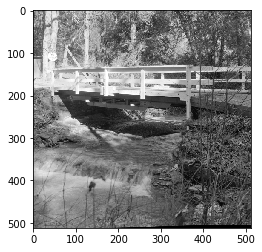

In [9]:
imshow(test)

# Ejercicio 1: Suma, resta, producto, compresión de rango dinámico

Para los operadores puntuales básicos de suma, resta y producto se utilizan los mismos operadores implementados sobre los `ndarrays` de Numpy. En todos los casos, se asume que se operan sobre imagenes de mismo tamaño.

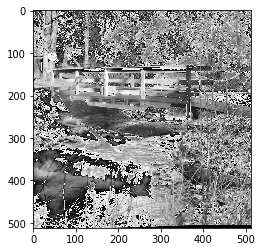

In [10]:
imshow(test + test)

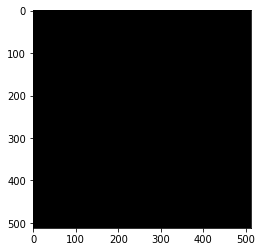

In [11]:
imshow(test - test)

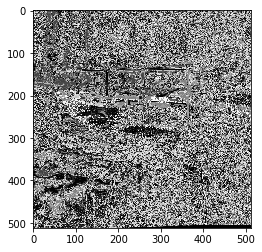

In [12]:
imshow(test * test)

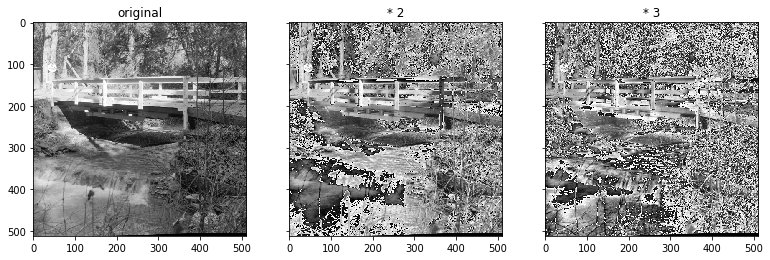

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_figwidth(13)

imshow(test, ax1, 'original')
imshow(test * 2, ax2, '* 2')
imshow(test * 3, ax3, '* 3')

## Compresión de rango dinámico

In [14]:
np.log(1 + 255)

5.545177444479562

In [15]:
def drc(img):
    '''Aplica compresión de rango dinámico sobre la imagen'''
    max_value = img.max()
    # Busca la constante c tal que drc(img) = c * log(1 + max_value)
    # siendo que T(0) = 0 y T(r) = L - 1
    c = (L-1) / np.log(1 + max_value)
    # Recastea img a uint16 para evitar posible overflow al hacer 1 + img
    img = img.astype(np.uint16)
    return np.uint8(c * np.log(1 + img))

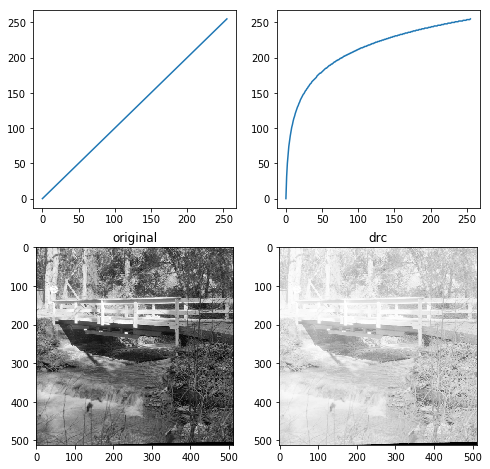

In [16]:
fig, ((a1, a2), (g1, g2)) = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(8)

a1.plot(X, X)
imshow(test, g1, 'original')

a2.plot(X, drc(X))
imshow(drc(test), g2, 'drc')

# Ejercicio 2: Negativo

In [17]:
def negative(img):
    return np.uint8(-img + L - 1)

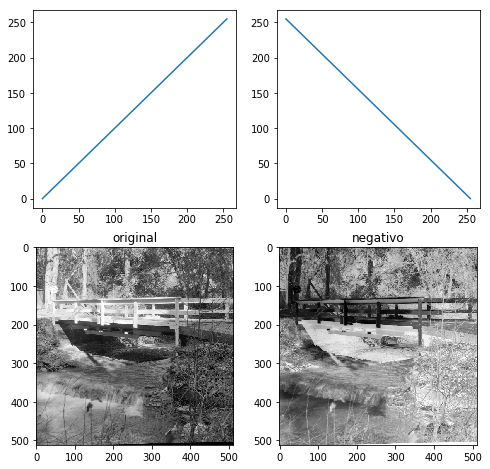

In [18]:
fig, ((a1, a2), (g1, g2)) = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(8)

a1.plot(X, X)
imshow(test, g1, 'original')

a2.plot(X, negative(X))
imshow(negative(test), g2, 'negativo')

# Ejercicio 3: Umbral

In [19]:
def threshold(img, u=0.5):
    return np.uint8(img > (L * u)) * (L - 1)

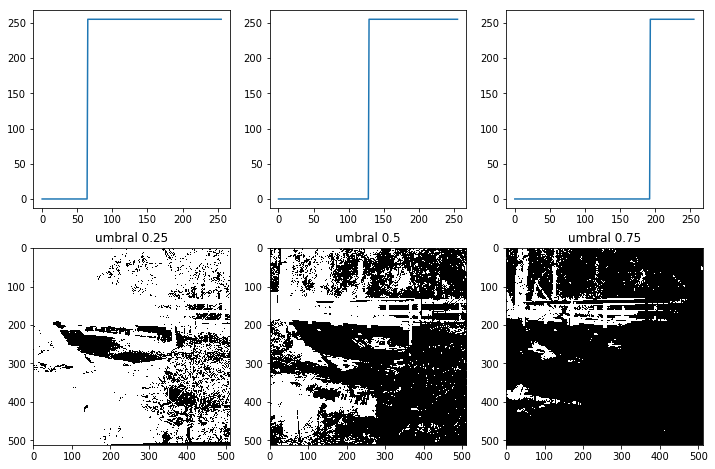

In [20]:
fig, ((a1, a2, a3), (g1, g2, g3)) = plt.subplots(2, 3)
fig.set_figwidth(12)
fig.set_figheight(8)

a1.plot(X, threshold(X, 0.25))
imshow(threshold(test, 0.25), g1, 'umbral 0.25')

a2.plot(X, threshold(X, 0.5))
imshow(threshold(test, 0.5), g2, 'umbral 0.5')

a3.plot(X, threshold(X, 0.75))
imshow(threshold(test, 0.75), g3, 'umbral 0.75')

# Ejercicio 4: Planos de bits

In [21]:
# Arma la lista de las máscaras para extraer los 8 planos
# de bits de la imagen. Como es una imagen de 8bit (escala de grises),
# hay 8 planos.
planes = [1 << j for j in range(8)]
planes

[1, 2, 4, 8, 16, 32, 64, 128]

In [22]:
# Genera los 8 planos haciendo un AND entre la imagen original
# y la máscara correspondiente. Esto genera una matriz de 1s y 0s.
# Finalmente multiplico la matriz por (L-1) para escalar los 1s a 255s.
test_planes = [(np.bitwise_and(test, plane) > 0) * (L-1)
               for plane in planes]

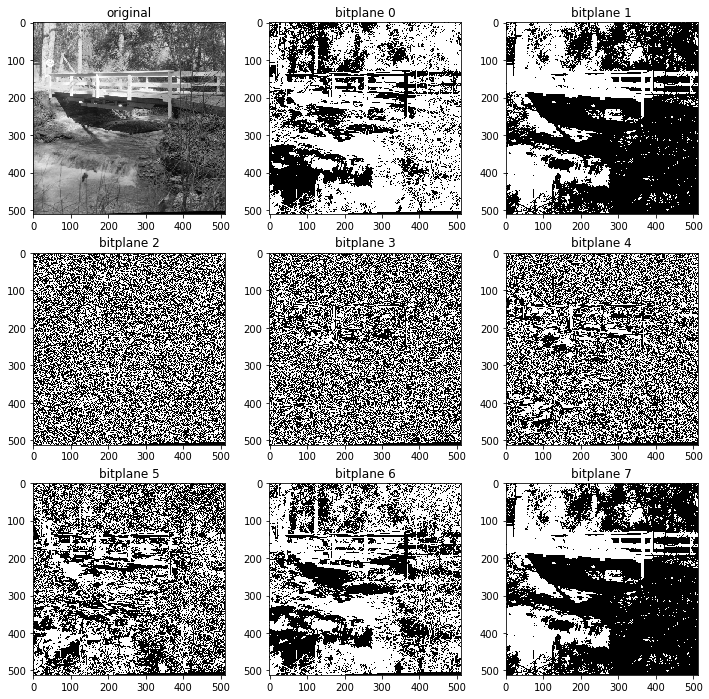

In [23]:
fig, ((orig, i0, i1), row2, row3) = plt.subplots(3, 3)
fig.set_figwidth(12)
fig.set_figheight(12)

# Grafica primero imagen original
imshow(test, orig, 'original')

# Reune todos los bitplanes y los grafica
plot_planes = [i0, i1] + list(row2) + list(row3)
for i, fig in enumerate(plot_planes):
    imshow(test_planes[i], fig, 'bitplane {0}'.format(i))

# Ejercicio 5: Histograma

Para los ejercicios relacionados al histograma de una imagen, se trabajará con una versión modificada de muy bajo contraste de una huella pulgar.

In [24]:
huella = imread('img/fingerprint_lc.png')

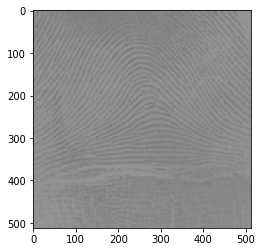

In [25]:
imshow(huella)

El histograma de una imagen es un vector (en este caso, de tamaño L) cuyos valores son las frecuencias de cada nivel de gris. La siguiente función `histogram` devuelve el histograma de una imagen ya normalizado, o sea, cada valor es la frecuencia relativa o probabilidad puntual de cada valor de gris.

In [26]:
def freq(img):
    '''Calcula la frecuencia de cada nivel del gris de la imagen'''
    freq = np.zeros(L)
    for x in np.nditer(img):
        freq[x] += 1
    return freq

def histogram(img):
    '''Devuelve el histograma normalizado de la imagen'''
    hist = freq(img)
    # Divide todos los valores por el tamaño de la imagen
    # para obtener la frecuencia relativa
    w, h = img.shape
    return hist / (w * h)

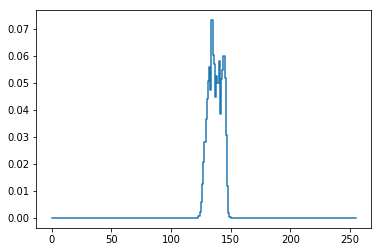

In [27]:
hist_huella = histogram(huella)
plt.step(X, hist_huella)

In [28]:
# La suma del histograma debería dar 1, pues la sumatoria de la
# probabilidad puntual para todo valor de gris da 1.
sum(hist_huella)

1.0

# Ejercicio 6: Aumento de contraste

Por el histograma del ejercicio 5, se puede ver que todos los valores de grises de la imagen están entre el 120 y 150 aproximadamente. Con más exactitud serían el mínimo y máximo de la matriz de la imagen:

In [29]:
min_h, max_h = huella.min(), huella.max()

Usando el operador puntual *umbral* ya definido, se busca el punto medio para el cual la mitad de los valores de grises de la imagen caen de un lado, y la otra mitad del otro. El umbral deseado va a estar dado por:

In [30]:
((max_h - min_h) / 2 + min_h) / L

0.53125

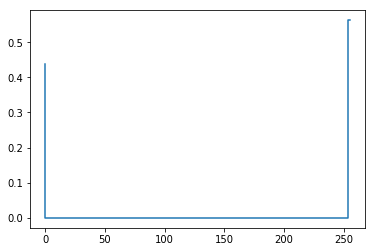

In [31]:
huella_um = threshold(huella, 0.53125)
plt.step(X, histogram(huella_um))

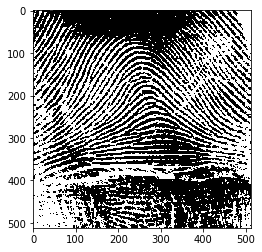

In [32]:
imshow(threshold(huella, 0.54))

# Ejercicio 7: Ecualización de histograma

In [33]:
def histogram_cdf(img):
    '''Calcula la suma acumulada del histograma'''
    hist = np.cumsum(freq(img))
    w, h = img.shape
    return hist / (w * h)

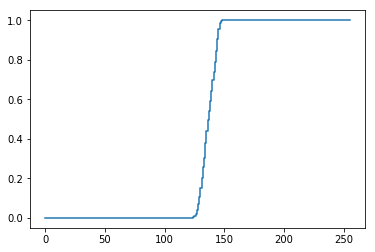

In [34]:
plt.step(X, histogram_cdf(huella))

In [35]:
def histeq(img):
    '''Aplica ecualización de histograma estándar sobre una imagen'''
    
    # Calcula el histograma de la imagen original,
    # y su función de distribución acumulada.
    h = histogram(img)
    h_acum = histogram_cdf(img)
    
    # Busca el minimo en la acumulada
    s_min = h_acum.min()
    
    # Genera el nuevo histograma de distribución uniforme
    # [0, L-1] a partir de la acumulada original, y escalo
    # los valores para poder generar una nueva imagen con el
    # nuevo histograma.
    hist = np.floor(((h_acum - s_min) / (1 - s_min)) * (L - 1) + 0.5)
    t = np.vectorize(lambda x: hist[x], otypes=[np.uint8])

    return t(img)

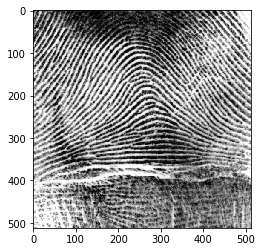

In [36]:
huella_eq = histeq(huella)
imshow(huella_eq)

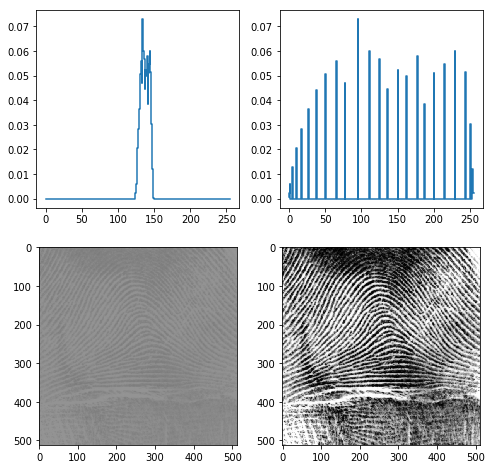

In [37]:
fig, ((a1, a2), (g1, g2)) = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(8)

a1.step(X, histogram(huella))
imshow(huella, g1)

a2.step(X, histogram(huella_eq))
imshow(huella_eq, g2)

# Ejercicio 8

Volver a aplicar la ecualización de histograma sobre una imagen a la que ya fue ecualizada no causa efecto aparente porque los niveles de gris ya fueron distribuidos de manera uniforme.

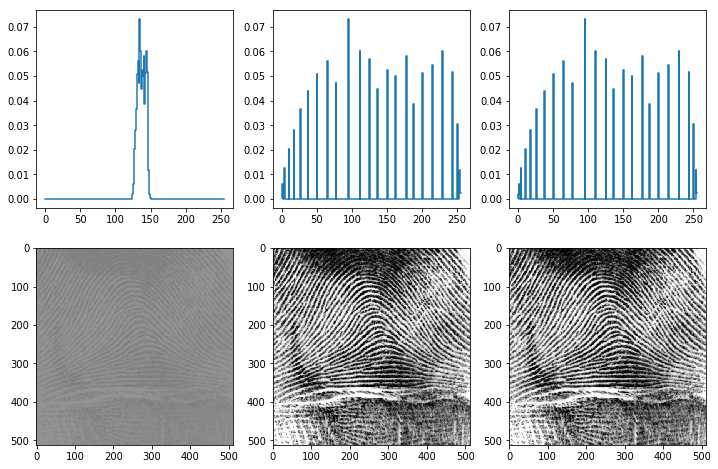

In [38]:
fig, ((a1, a2, a3), (g1, g2, g3)) = plt.subplots(2, 3)
fig.set_figwidth(12)
fig.set_figheight(8)

a1.step(X, histogram(huella))
imshow(huella, g1)

a2.step(X, histogram(huella_eq))
imshow(huella_eq, g2)

huella_eq2 = histeq(huella_eq)
a3.step(X, histogram(huella_eq2))
imshow(huella_eq2, g3)